In [11]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
data = pd.read_csv(r'C:\Users\Admin\resources\OnlineRetail.csv',encoding = 'ISO-8859-1')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
#Bộ dữ liệu chứa 541909 dòng dữ liệu và 8 cột, chỉ có cột CustomerID không có đầy đủ thông tin (406829 non-null <541909 )
#InvoiceNo, StockCode, Description, InvoiceDate, country: là thuộc tính định tính, có thang đo định danh
#CustomerID mặc dù có kiểu số (float64), nhưng các con số này chỉ có ý nghĩa phân biệt khác hàng này với khách hàng khác –> thuộc tính định danh
#Quantity, UnitPrice: thuộc tính định lượng, thang đo ratio 

In [5]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
#Trích xuất dữ liệu các cột Description và Quantity lưu vào file OnlineRetail.csv
data.loc[:,['Description','Quantity']].to_csv('demo_OnlineRetail.csv')

In [ ]:
#Trích xuất dữ liệu 1000 dòng đầu tiên lưu vào file OnlineRetail.xlsx
data.iloc[0:1000,:].to_excel('demo_OnlineRetail.xlsx')

In [ ]:
#Trích xuất các bản ghi có số lượng từ 10 trở lên lưu vào file OnlineRetail.h5
data.loc[data.Quantity >= 10].to_hdf('demo_OnlineRetail.h5', 'table')

In [ ]:
#Trích xuất dữ liệu các phần tử từ dòng 1000 đến dòng 2000, các cột Quantity, InvoiceDate, UnitPrice lưu vào file OnlineRetail.json
data.loc[1000:2000,['Quantity','InvoiceDate','UnitPrice']].to_json('demo_OnlineRetail.json',orient='columns')

In [ ]:
#Trích xuất các bản ghi có số hóa đơn ‘536365’ lưu vào file OnlineRetail.html
data.loc[data.InvoiceNo =='536365'].to_html('demo_OnlineRetail.html')

In [ ]:
#Công ty bán hàng tại bao nhiêu quốc gia
country = data.Country.unique()
print('Số lượng các quốc gia: ' + str(country.size))

In [ ]:
#Số lượng đơn hàng bán ra và tổng doanh thu
# Tạo cột tính thành tiền của các mặt hàng
data['total'] = data['Quantity'] * data['UnitPrice'] 

# Giá trị đơn hàng của mỗi đơn hàng
total_invoices = data['total'].sum()
print ("số lượng hóa đơn bán ra: "+ str (total_invoices.size))
print ("Tổng doanh thu: " + str(total_invoices.sum()))

In [ ]:
#Top 10 mặt hàng có số lượng bán ra lớn nhất
quantity_product = data.groupby(['StockCode', 'Description'])['Quantity'].sum().sort_values(ascending= False)
quantity_product.head(10)

In [ ]:
#Top 10 mặt hàng có doanh thu lớn nhất
quantity_product = data.groupby(['StockCode', 'Description'])['total'].sum().sort_values(ascending= False)
quantity_product.head(10)

In [ ]:
#Chúng ta nhìn thấy rằng, mặt hàng bán ra với số lượng nhiều nhất, không phải mặt hàng mang lại doanh thu lớn nhất Có một số mặt hàng như 85099B – JUMBO BAG RED RETROSPOT và 23084 RABBIT NIGHT LIGHT nằm trong top 10 cả về số lượng lẫn doanh thu

In [ ]:
#Xây dựng bảng Pivot table, với mỗi Số hóa đơn tính trung bình cộng số lượng các mặt hàng theo từng Quốc gia.
data.pivot_table(values='Quantity',index='InvoiceNo', columns='Country',aggfunc='mean')

In [ ]:
#Xây dựng bảng Pivot table, với mỗi Khách hàng cho biết số lượng mua hàng lớn nhất và nhỏ nhất theo Kho.
data.pivot_table(values='Quantity',index='CustomerID',aggfunc={min,max})

In [ ]:
#Xây dựng bảng Pivot table, với mỗi Mã kho tính tổng số lượng các mặt hàng và trung bình cộng giá.
data.pivot_table(values='UnitPrice',index='StockCode',aggfunc={sum,'mean'})

In [ ]:
#format = "%M-%D-%Y %H:%M"
#for i in data['InvoiceDate']:
#datetime.datetime.strptime(data['InvoiceDate'][1], format)


In [ ]:
data['Date']=pd.to_datetime(data['InvoiceDate'])

In [ ]:
data['Date']=data['Date'].dt.date

In [ ]:
#Xây dựng bảng Pivot table cho biết tổng số lượng hàng bán được của mỗi ngày.
data.pivot_table(values='Quantity',index='Date',aggfunc=sum)

In [3]:
#Tạo cột mới có tên quý –  ‘Previous’ nhận giá trị 1 nếu ngày lập hóa đơn nằm trong các tháng 1,2,3; nhận giá trị 2 nếu ngày lập hóa đơn nằm trong các tháng 4,5,6; nhận giá trị 3 nếu ngày lập hóa đơn nằm trong các tháng 7,8,9;  nhận giá trị 4 nếu ngày lập hóa đơn nằm trong các tháng 10,11,12;
data['Month']=pd.to_datetime(data['InvoiceDate']).dt.month
Giatri1=(data['Month'] >=1) & (data['Month'] <=3)
Giatri2=(data['Month'] >=4) & (data['Month'] <=6)
Giatri3=(data['Month'] >=7) & (data['Month'] <=9)
condition=[Giatri1,Giatri2,Giatri3]
xl=[1,2,3]
data['Quý - Previous']=np.select(condition,xl,default=4)

In [4]:
#Tạo một cột mới có tên ‘Amount’ có giá trị bằng Quantity * UnitPrice
data['Amount']=round(data['Quantity']*data['UnitPrice'],2)
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Quý - Previous,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,12,4,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,12,4,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,12,4,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,12,4,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,12,4,20.34


In [5]:
#Tạo cột mới ‘Discount’ nhận giá trị 10% nếu Country là ‘United Kingdom’ và thuộc quý 4, 5% nếu là ‘France’ ngược lại là 0%.
Giatri10=(data['Country'] =='United Kingdom') & (data['Quý - Previous'] ==4)
Giatri5=data['Country'] =='France'
dk=[Giatri10,Giatri5]
pt=[0.1,0.05]
data['Discount']=np.select(dk,pt,default=0)

In [6]:
#Tạo cột mới ‘Total’ nhận giá trị bằng: Amount – Discount
data['Total'] = data['Amount'].astype(str) + " - " + data['Discount'].astype(str)

In [6]:
#tìm dữ liệu khuyết thiếu
data.isna()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
541904,False,False,False,False,False,False,False,False
541905,False,False,False,False,False,False,False,False
541906,False,False,False,False,False,False,False,False
541907,False,False,False,False,False,False,False,False


In [ ]:
# Quantity thiếu gây ảnh hưởng đến quá trình kiểm kê dự trù 
#Các giá trị còn lại thiếu ảnh hưởng đến xác định sản phẩm đó, đôi khi có thể tra lại được từ những thông tin đã có

In [26]:
df2=(data.loc[:,['Quantity','UnitPrice']]).interpolate(axis=1)
df2

,Quantity,UnitPrice
0,6.0,2.55
1,6.0,3.39
2,8.0,2.75
3,6.0,3.39
4,6.0,3.39
...,...,...
541904,12.0,0.85
541905,6.0,2.10
541906,4.0,4.15
541907,4.0,4.15


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Quantity'>

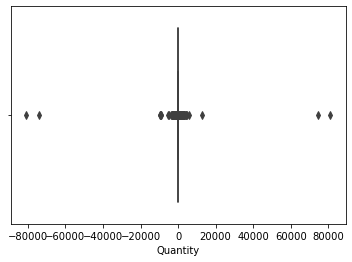

In [27]:
sns.boxplot(df2['Quantity'])

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='UnitPrice'>

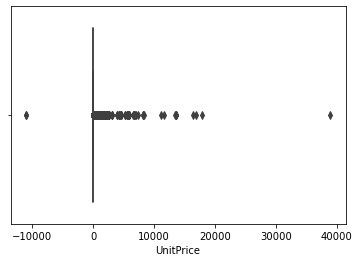

In [28]:
sns.boxplot(df2['UnitPrice'])

In [29]:
# tính giá trị Q1 và Q3
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)

In [30]:
# tính IQR 
IQR = Q3-Q1

In [34]:
# lọc dữ liệu ngoại lai
df3 = df2[~((df2 < (Q1 - 1.5 * IQR)) | (df2 > (Q3 + 1.5 * IQR))).any(axis=1)]
df3

,Quantity,UnitPrice
0,6.0,2.55
1,6.0,3.39
2,8.0,2.75
3,6.0,3.39
4,6.0,3.39
...,...,...
541904,12.0,0.85
541905,6.0,2.10
541906,4.0,4.15
541907,4.0,4.15


<AxesSubplot:>

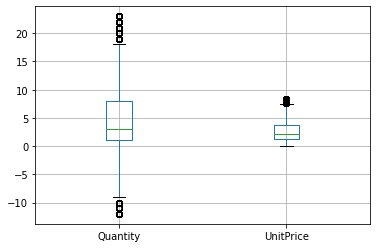

In [32]:
df3.boxplot()

In [ ]:
#Giá trị ngoại lai của thuộc tính Quantity chứa giá trị <0, giá trị ngoại lai của UnitPrice =0